In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier as cb

In [11]:
# https://www.kaggle.com/datasets/shwetabh123/mall-customers
# ссылка на датасет.

In [12]:
data = pd.read_csv('Mall_Customers.csv')
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
data = data.drop(['CustomerID'], axis = 1)

In [14]:
# Видим, что данные заполненые качественно и нет других обозначений(например: F, M, female).
# Это упростит их замену на цифровые обозначения.
data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
# посмотрим описание данных в таблице.
# так же заменим буквенные обозначения пола на цифровые. 

df = data[['Genre', 'Annual Income (k$)', 'Age', 'Spending Score (1-100)']]
cat_reshape = {"Genre": {"Male": 1, "Female": 0}}
df = df.replace(cat_reshape)
df.describe()

,Genre,Annual Income (k$),Age,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,60.560000,38.850000,50.200000
std,0.497633,26.264721,13.969007,25.823522
min,0.000000,15.000000,18.000000,1.000000
25%,0.000000,41.500000,28.750000,34.750000
50%,0.000000,61.500000,36.000000,50.000000
75%,1.000000,78.000000,49.000000,73.000000
max,1.000000,137.000000,70.000000,99.000000


In [18]:
# Выше видно, что распределение по полу почти 50 на 50, как и рейтинг трат. И средний возраст 38-39 лет. (строка mean) 
# По статистике этот возраст попадает в одну из самых платежеспособных групп по возрасту.
# https://www.statista.com/statistics/233184/median-household-income-in-the-united-states-by-age/ (статистика по США за 2022 год)
# Скорее всего, возраст будет самым важным признаком для обучения. Проверим это в конце.

In [19]:
# Нормализуем данные. Нормализация была выбрана, т.к. нужно сохранить изначальное распределение. 
from sklearn import preprocessing

d = preprocessing.normalize(df)
df_scaled = pd.DataFrame(d, columns=['Genre', 'Annual Income (k$)', 'Age', 'Spending Score (1-100)'] )
df_scaled.head()

,Genre,Annual Income (k$),Age,Spending Score (1-100)
0,0.021780,0.326705,0.413826,0.849433
1,0.011762,0.176434,0.247008,0.952743
2,0.000000,0.608229,0.760286,0.228086
3,0.000000,0.195267,0.280697,0.939723
4,0.000000,0.318439,0.580683,0.749269


In [20]:
X = df_scaled.drop(["Spending Score (1-100)"], axis = 1)
y = df_scaled['Spending Score (1-100)']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.15, random_state=42)

In [22]:
'''
model = cb(
    iterations=266,
    loss_function='MultiClass',
    learning_rate=8.059714004673094e-05,
    depth=10,
    task_type="GPU",
    devices='0:1',
    verbose=True
)
'''

In [23]:
'''
model.fit(x_train, y_train)
'''

0:	learn: 5.0304115	total: 446ms	remaining: 1m 58s
1:	learn: 5.0303867	total: 898ms	remaining: 1m 58s
2:	learn: 5.0303867	total: 906ms	remaining: 1m 19s
3:	learn: 5.0303636	total: 1.33s	remaining: 1m 27s
4:	learn: 5.0303365	total: 1.78s	remaining: 1m 33s
5:	learn: 5.0303117	total: 2.23s	remaining: 1m 36s
6:	learn: 5.0302870	total: 2.68s	remaining: 1m 39s
7:	learn: 5.0302635	total: 3.12s	remaining: 1m 40s
8:	learn: 5.0302375	total: 3.56s	remaining: 1m 41s
9:	learn: 5.0302128	total: 3.99s	remaining: 1m 42s
10:	learn: 5.0301885	total: 4.42s	remaining: 1m 42s
11:	learn: 5.0301633	total: 4.87s	remaining: 1m 43s
12:	learn: 5.0301370	total: 5.33s	remaining: 1m 43s
13:	learn: 5.0301123	total: 5.8s	remaining: 1m 44s
14:	learn: 5.0300871	total: 6.29s	remaining: 1m 45s
15:	learn: 5.0300612	total: 6.78s	remaining: 1m 45s
16:	learn: 5.0300373	total: 7.24s	remaining: 1m 46s
17:	learn: 5.0300373	total: 7.25s	remaining: 1m 39s
18:	learn: 5.0300125	total: 7.7s	remaining: 1m 40s
19:	learn: 5.0299886	tot

In [24]:
model = cb()
model.load_model("Готовая модель_mail_customers_1")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

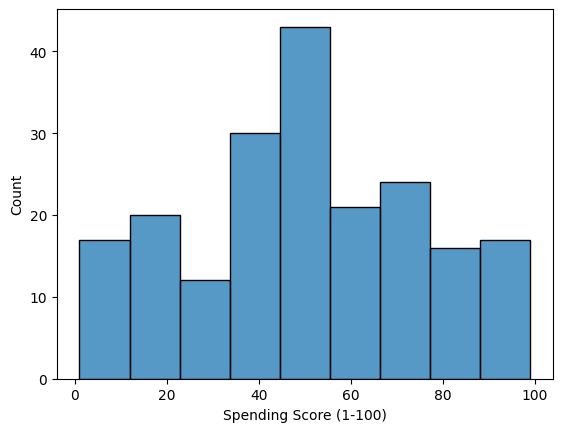

In [25]:
sns.histplot(data['Spending Score (1-100)'])

In [25]:
# т.к. целевая переменная имеет нормальную дисперсию(за небольшим исключением, которым можно принеберечь), то выберем в качестве метрики MSE,
# т.к. эта метрика более чувствительна к большим ошибкам,
# что позволит нам понять, насколько сильно модель ошибается при маленьком наборе данных и нармальном распределении
# т.е. научилась предсказывать каждый случай наиболее точно.

In [26]:
from sklearn.metrics import mean_squared_error

train_score_error = mean_squared_error(y_train, model.predict(x_train)
                           )
valid_score_error = mean_squared_error(y_valid, model.predict(x_valid)
                           )
test_score_error = mean_squared_error(y_test, model.predict(x_test)
                           )



print(f"Train-score-error: {round(train_score_error, 6)}, Valid-score-error: {round(valid_score_error, 6)}, Test-score-error: {round(test_score_error, 6)}")

Train-score-error: 0.0, Valid-score-error: 0.009428, Test-score-error: 0.009051


In [ ]:
# Как видно средне квадратичная ошибка на тестовой выборке менее одного процента. 
# При изначальном наборе из двухсот клиентов модель научилась предсказать рейтинг расходов клиента,
# что может быть полезно при рекламных акция и рекомендациях товаров и услуг.

In [ ]:
# Значение метрики легко понять, т.к. описания целевой переменной нет, но в скобках указано 0-100, то вероятнее всего, это процентные исчесления.
# В данном случае нам не важно, что берется за 100, а что за 0. Важна ошибках в единицах исчесления этой переменной.
# и на тестовой выборке она равна 0.009051.

In [28]:
model.save_model("Готовая модель_mail_customers_1")

In [27]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Age,37.313809
1,Annual Income (k$),36.333911
2,Genre,26.352280


In [ ]:
# И как видно по итогу, возраст оказался самым фажным признаком при обучении, 
# а зарплата(которая имеет корреляцию с возрастом из статьи по ссылке выше это видно) на втором месте с минимальным отрывом. Пол оказался менее значим.